In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

In [3]:
History_Data['Hour'] = History_Data['Hour'] - 1

In [4]:
History_Data['Year'] = History_Data['Year'].astype(str)
History_Data['Month'] = History_Data['Month'].astype(str)
History_Data['Day'] = History_Data['Day'].astype(str)
History_Data['Hour'] = History_Data['Hour'].astype(str)
History_Data['Datetime'] = (History_Data['Year']) +'-' + (History_Data['Month']) +'-' + (History_Data['Day']) \
                           + '-' + (History_Data['Hour'])

In [5]:
History_Data= History_Data.dropna()

In [6]:
History_Data.drop('Year', axis =1 , inplace= True)
History_Data.drop('Month', axis =1 , inplace= True)
History_Data.drop('Day', axis =1 , inplace= True)
History_Data.drop('Hour', axis =1 , inplace= True)
History_Data['Timestamp'] = pd.to_datetime(History_Data.Datetime,format='%Y-%m-%d-%H') 

train=History_Data.iloc[0:17520,:]
test=History_Data.iloc[17520:26303,:]

In [7]:
History_Data.index = History_Data.Timestamp 
train.index = train.Timestamp 
test.index = test.Timestamp 

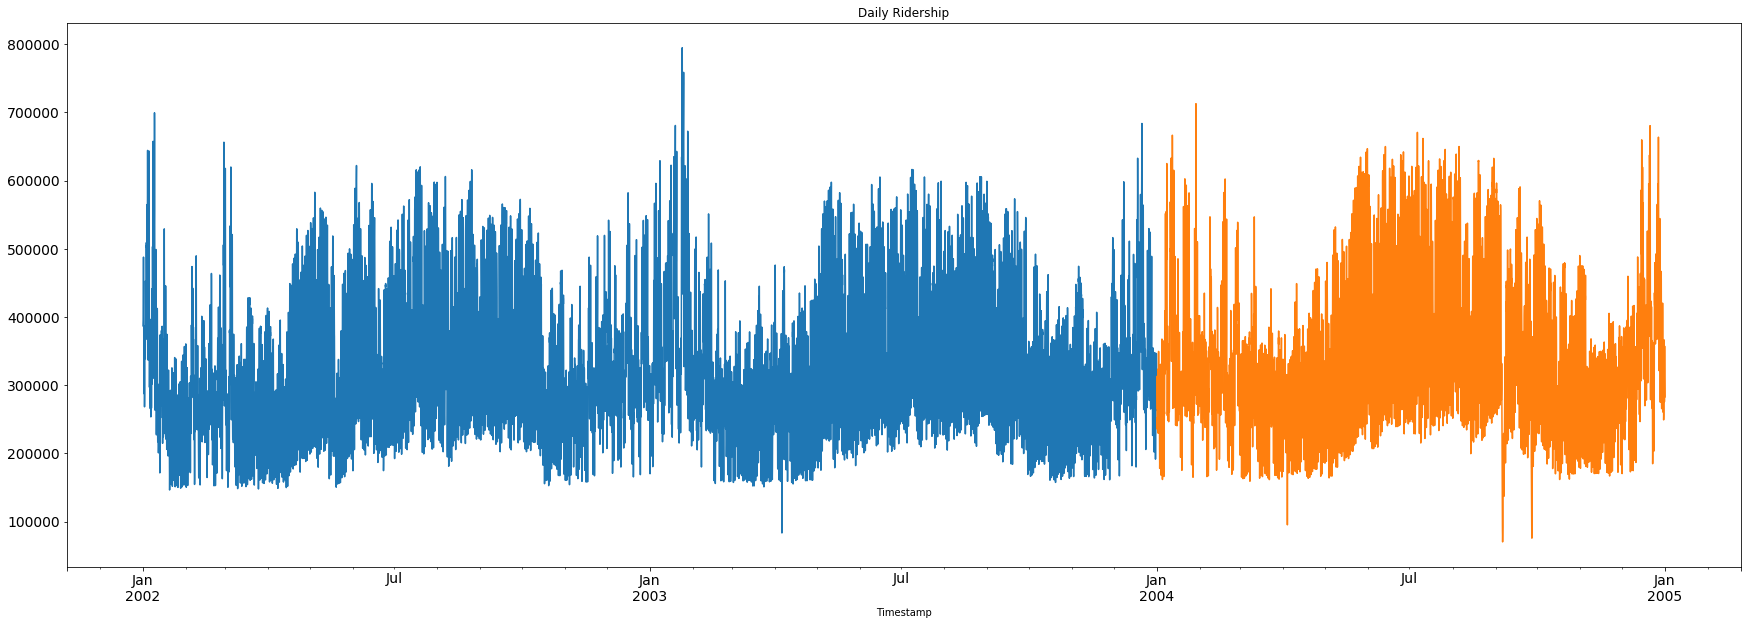

In [8]:
train['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)
test['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

In [9]:
History_Data

,T,Load_kW,Datetime,Timestamp
Timestamp,,,,
2002-01-01 00:00:00,36.0,387190.0,2002-1-1-0,2002-01-01 00:00:00
2002-01-01 01:00:00,35.0,389977.0,2002-1-1-1,2002-01-01 01:00:00
2002-01-01 02:00:00,34.0,391881.0,2002-1-1-2,2002-01-01 02:00:00
2002-01-01 03:00:00,32.0,396362.0,2002-1-1-3,2002-01-01 03:00:00
2002-01-01 04:00:00,33.0,408553.0,2002-1-1-4,2002-01-01 04:00:00
2002-01-01 05:00:00,32.0,426902.0,2002-1-1-5,2002-01-01 05:00:00
2002-01-01 06:00:00,31.0,449139.0,2002-1-1-6,2002-01-01 06:00:00
2002-01-01 07:00:00,32.0,473425.0,2002-1-1-7,2002-01-01 07:00:00
2002-01-01 08:00:00,36.0,487921.0,2002-1-1-8,2002-01-01 08:00:00


In [10]:
History_Data_1year_after = History_Data.shift(365*24)
History_Data_1year_after = History_Data_1year_after[['Load_kW', 'Timestamp']]

In [11]:
#History_Data_1year_after[History_Data_1year_after['Timestamp'] >= '2004-01-1']
History_Data_1year_after = History_Data_1year_after.dropna()
History_Data_1year_after

,Load_kW,Timestamp
Timestamp,,
2003-01-01 00:00:00,387190.0,2002-01-01 00:00:00
2003-01-01 01:00:00,389977.0,2002-01-01 01:00:00
2003-01-01 02:00:00,391881.0,2002-01-01 02:00:00
2003-01-01 03:00:00,396362.0,2002-01-01 03:00:00
2003-01-01 04:00:00,408553.0,2002-01-01 04:00:00
2003-01-01 05:00:00,426902.0,2002-01-01 05:00:00
2003-01-01 06:00:00,449139.0,2002-01-01 06:00:00
2003-01-01 07:00:00,473425.0,2002-01-01 07:00:00
2003-01-01 08:00:00,487921.0,2002-01-01 08:00:00


In [12]:
test

,T,Load_kW,Datetime,Timestamp
Timestamp,,,,
2004-01-01 00:00:00,46.0,251611.0,2004-1-1-0,2004-01-01 00:00:00
2004-01-01 01:00:00,45.0,246499.0,2004-1-1-1,2004-01-01 01:00:00
2004-01-01 02:00:00,43.0,239736.0,2004-1-1-2,2004-01-01 02:00:00
2004-01-01 03:00:00,43.0,235836.0,2004-1-1-3,2004-01-01 03:00:00
2004-01-01 04:00:00,43.0,239219.0,2004-1-1-4,2004-01-01 04:00:00
2004-01-01 05:00:00,42.0,249191.0,2004-1-1-5,2004-01-01 05:00:00
2004-01-01 06:00:00,40.0,263114.0,2004-1-1-6,2004-01-01 06:00:00
2004-01-01 07:00:00,41.0,281236.0,2004-1-1-7,2004-01-01 07:00:00
2004-01-01 08:00:00,48.0,306074.0,2004-1-1-8,2004-01-01 08:00:00


In [13]:
#y_hat_avg = test
y_hat_avg = test[['Load_kW', 'Timestamp']]
y_hat_avg

,Load_kW,Timestamp
Timestamp,,
2004-01-01 00:00:00,251611.0,2004-01-01 00:00:00
2004-01-01 01:00:00,246499.0,2004-01-01 01:00:00
2004-01-01 02:00:00,239736.0,2004-01-01 02:00:00
2004-01-01 03:00:00,235836.0,2004-01-01 03:00:00
2004-01-01 04:00:00,239219.0,2004-01-01 04:00:00
2004-01-01 05:00:00,249191.0,2004-01-01 05:00:00
2004-01-01 06:00:00,263114.0,2004-01-01 06:00:00
2004-01-01 07:00:00,281236.0,2004-01-01 07:00:00
2004-01-01 08:00:00,306074.0,2004-01-01 08:00:00


In [14]:
y_hat_avg['Holt_Winter'] = pd.merge(y_hat_avg, History_Data_1year_after, how = 'inner',
                     left_index= True, right_index= True)['Load_kW_y']
y_hat_avg

/Users/yifengwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Load_kW,Timestamp,Holt_Winter
Timestamp,,,
2004-01-01 00:00:00,251611.0,2004-01-01 00:00:00,205874.0
2004-01-01 01:00:00,246499.0,2004-01-01 01:00:00,190513.0
2004-01-01 02:00:00,239736.0,2004-01-01 02:00:00,176767.0
2004-01-01 03:00:00,235836.0,2004-01-01 03:00:00,170318.0
2004-01-01 04:00:00,239219.0,2004-01-01 04:00:00,170551.0
2004-01-01 05:00:00,249191.0,2004-01-01 05:00:00,178139.0
2004-01-01 06:00:00,263114.0,2004-01-01 06:00:00,190345.0
2004-01-01 07:00:00,281236.0,2004-01-01 07:00:00,207088.0
2004-01-01 08:00:00,306074.0,2004-01-01 08:00:00,232549.0


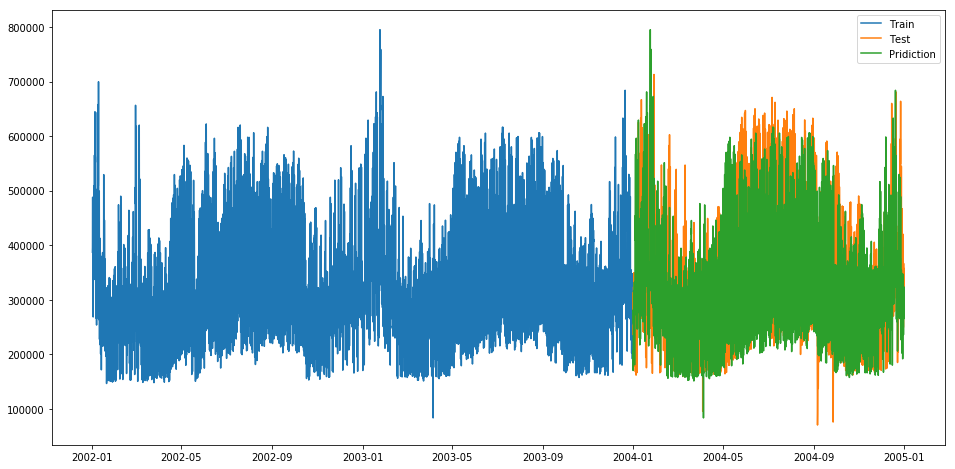

In [15]:
plt.figure(figsize=(16,8))

plt.plot(train['Load_kW'], label='Train')
plt.plot(test['Load_kW'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Holt_Winter'], label='Pridiction')
plt.legend(loc='best')
plt.show()

In [16]:
rms = sqrt(mean_squared_error(test['Load_kW'], y_hat_avg['Holt_Winter']))
print(rms)
mape = mean_absolute_percentage_error(test['Load_kW'], y_hat_avg['Holt_Winter'])
print(mape)

83807.95827641958
17.872624254527626
